# Test of Greg Kamradt's semantic chunking for Chinese

In [1]:
with open('../../../text_files/your_cat_part_3.txt') as file:
    essay = file.read()

In [2]:
import re

# Splitting the essay on '.', '?', and '!'
single_sentences_list = re.split(r'(?<=[.?!。？；])\s+', essay)
print (f"{len(single_sentences_list)} senteneces were found")

400 senteneces were found


In [6]:
# print(single_sentences_list[0:5])
for i, sentence in enumerate(single_sentences_list[:5]):
    print(f"sentence {i}: {sentence}")

sentence 0: 【第三部】

年輕成貓的燦爛時光

貓長大了—該餵什麼食物?
sentence 1: 小貓現在長大了,你可能在想是不是該做些什麼改變,好讓你這位
進入成年期的特別朋友跟幼貓期一樣健康。當然你得帶貓去結紮
如果你還沒有這麼做。每年還要帶貓去給獸醫做一次健康檢查。你可能會
覺得或許這個階段,食物也該做一些調整,但其實沒有必要。野生的幼貓
長大後還是獵捕相同的獵物,所以你的年輕成貓只要繼續吃幼貓期吃的高
蛋白質、低碳水化合物的食物即可。如果你目前是餵貓吃乾飼料,那麼該
是轉吃健康食物的時候,以確保健康的貓生。
sentence 2: 生命階段概念的謬誤
多年來,寵物食品公司以「生命階段」為概念,行銷他們製造的乾
飼料和罐頭。根據這套理論,幼貓需要特定的營養成分(包括蛋白質、
脂肪、碳水化合物、維他命和礦物質),成貓需要不一樣的營養成分,
而老貓又是另一套不同的營養成分,以維持最佳健康狀態。這個概念被
廣為接受,或者至少沒有遭遇到獸醫營養專家的反對。如此被廣為接受
是一件令人很意外的事,因為在貓食和貓本身的特性上,你可以看到許
多明顯的矛盾之處。
sentence 3: 在野外,不管是小型還是大型貓科動物,都沒有隨著年紀的增加而
改變食物中的營養成分。所有貓科動物一旦斷奶之後,便跟著吃成貓捕
獲的獵物,例如小型哺乳動物、鳥、蜥蜴、鳥蛋、昆蟲,諸如此類。幼
貓跟著成貓一起吃,或者吃成貓吃剩的。在貓的一生中,年輕貓和老貓
捕獲而吃下的獵物並沒有什麼不同。貓的食物確實會隨著時間的過去而
轉變,不過那是環境中可供選擇的獵物增加或減少的緣故,跟貓年紀完
全無關。
sentence 4: 我們知道幼貓自然吃下的養分,和成貓的食物養分是完全一樣的。


In [7]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]

### function for combine sentences into group
buffer_size is the group size

In [8]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences



In [9]:
sentences = combine_sentences(sentences)

In [10]:
sentences[0:3]

[{'sentence': '【第三部】\n\n年輕成貓的燦爛時光\n\n貓長大了—該餵什麼食物?',
  'index': 0,
  'combined_sentence': '【第三部】\n\n年輕成貓的燦爛時光\n\n貓長大了—該餵什麼食物? 小貓現在長大了,你可能在想是不是該做些什麼改變,好讓你這位\n進入成年期的特別朋友跟幼貓期一樣健康。當然你得帶貓去結紮\n如果你還沒有這麼做。每年還要帶貓去給獸醫做一次健康檢查。你可能會\n覺得或許這個階段,食物也該做一些調整,但其實沒有必要。野生的幼貓\n長大後還是獵捕相同的獵物,所以你的年輕成貓只要繼續吃幼貓期吃的高\n蛋白質、低碳水化合物的食物即可。如果你目前是餵貓吃乾飼料,那麼該\n是轉吃健康食物的時候,以確保健康的貓生。'},
 {'sentence': '小貓現在長大了,你可能在想是不是該做些什麼改變,好讓你這位\n進入成年期的特別朋友跟幼貓期一樣健康。當然你得帶貓去結紮\n如果你還沒有這麼做。每年還要帶貓去給獸醫做一次健康檢查。你可能會\n覺得或許這個階段,食物也該做一些調整,但其實沒有必要。野生的幼貓\n長大後還是獵捕相同的獵物,所以你的年輕成貓只要繼續吃幼貓期吃的高\n蛋白質、低碳水化合物的食物即可。如果你目前是餵貓吃乾飼料,那麼該\n是轉吃健康食物的時候,以確保健康的貓生。',
  'index': 1,
  'combined_sentence': '【第三部】\n\n年輕成貓的燦爛時光\n\n貓長大了—該餵什麼食物? 小貓現在長大了,你可能在想是不是該做些什麼改變,好讓你這位\n進入成年期的特別朋友跟幼貓期一樣健康。當然你得帶貓去結紮\n如果你還沒有這麼做。每年還要帶貓去給獸醫做一次健康檢查。你可能會\n覺得或許這個階段,食物也該做一些調整,但其實沒有必要。野生的幼貓\n長大後還是獵捕相同的獵物,所以你的年輕成貓只要繼續吃幼貓期吃的高\n蛋白質、低碳水化合物的食物即可。如果你目前是餵貓吃乾飼料,那麼該\n是轉吃健康食物的時候,以確保健康的貓生。 生命階段概念的謬誤\n多年來,寵物食品公司以「生命階段」為概念,行銷他們製造的乾\n飼料和罐頭。根據這套理論,幼貓需要特定的營養成分(包括蛋白質、\n脂肪、碳水化合物、維他命和礦物質),成貓需要不一樣的營養成分,\n而老貓又是另一套不同的營養成分,以維持最

In [14]:
# from langchain_openai import OpenAIEmbeddings
# oaiembeds = OpenAIEmbeddings()

from langchain_community.embeddings.huggingface import HuggingFaceEmbeddings

embedding = HuggingFaceEmbeddings(
        model_name="aspire/acge_text_embedding",
        model_kwargs={'device': 'cpu'},
        show_progress=True
        )

In [15]:
embeddings = embedding.embed_documents([x['combined_sentence'] for x in sentences])

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

In [16]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]
print(len(sentences[0].get("combined_sentence_embedding")))

1792


### calculate cosine similarity

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance, 0 means the sentences are identical, 1 means they are unrelated, 2 means they are opposite
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [19]:
distances, sentences = calculate_cosine_distances(sentences)

In [20]:
distances[:3]

[0.030705045397349418, 0.084761145533784, 0.08150515150665272]

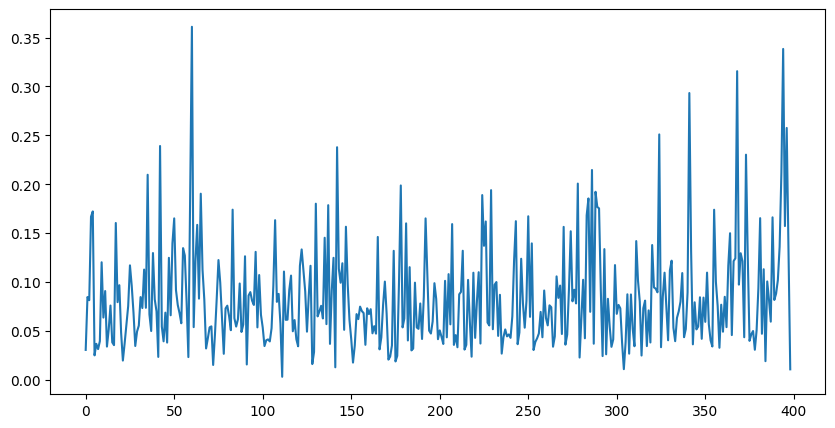

In [21]:
import matplotlib.pyplot as plt

# plt.plot(distances)
fig, ax = plt.subplots(figsize=(10, 5))  # 设置宽度为10英寸，高度为5英寸

# 绘制数据
ax.plot(distances)

95% threshold: 0.18071726420298598


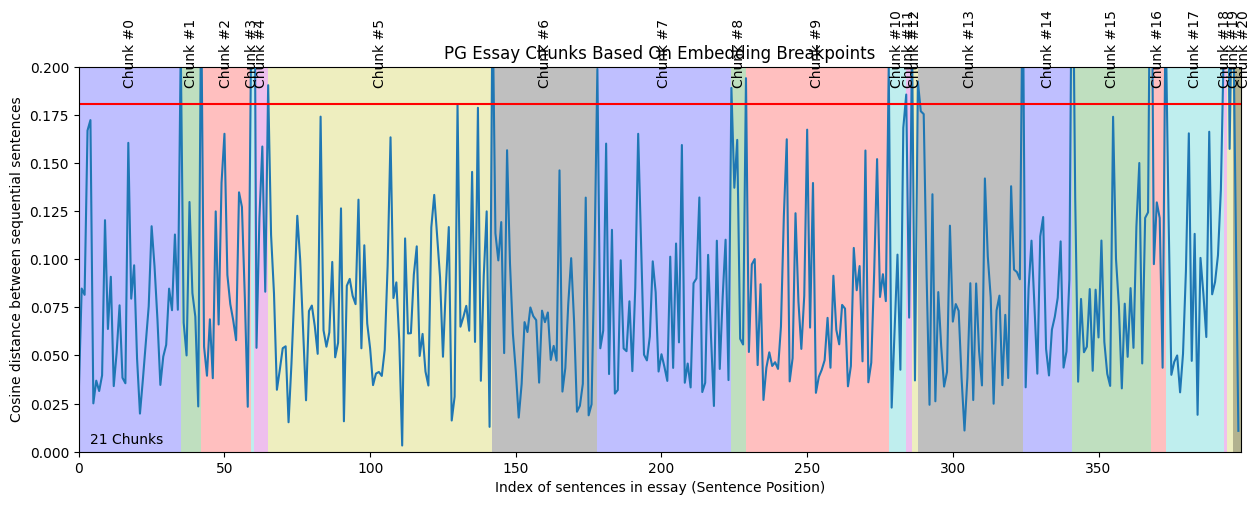

In [24]:
import numpy as np

fig, ax = plt.subplots(figsize=(15, 5))  # 设置宽度为10英寸，高度为5英寸
ax.plot(distances)
# plt.plot(distances)

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 95
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
print(f"95% threshold: {breakpoint_distance_threshold}")
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-')

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks")

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [25]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [27]:
for chunk in chunks:
    print(len(chunk))

5863
1220
1707
2
737
10252
6091
6334
384
7366
857
265
465
5635
3738
4825
447
1833
2
82
342


## show chunks

In [30]:
for i, chunk in enumerate(chunks[:4]):
    buffer = 100
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
【第三部】

年輕成貓的燦爛時光

貓長大了—該餵什麼食物? 小貓現在長大了,你可能在想是不是該做些什麼改變,好讓你這位
進入成年期的特別朋友跟幼貓期一樣健康。當然你得帶貓去結紮
如果你還沒有這麼做。
...
獸醫可以幫貓的身體做一個狀況評量,包括記錄體重。 如果有疾病存在,這些觀察所得到的訊息,可以為聰明的獸醫指出一個
正確的診斷方向。切記要求醫生比較以前和今年的體重以及身體狀況,
以期達到最佳健檢目的。


Chunk #1
基本上,一隻健康的成年公貓,體重大約介於四至五·四公斤之間
母貓則是介於三·二至四,五公斤。如果貓的體重超過這個數字就表示
貓過胖,除非是骨架大的緬因貓或挪威森林貓。現今的貓主人,有很多
並不知道體重
...
口腔和專業照顧,
貓不僅會在年輕時就開始掉牙,而且身體其他器官可能也會受到影響。牙
齦內含豐沛的血液,當牙齒因為滋生細菌而感染到牙齦時(即牙周病)
這些感染會造成發炎,而且會讓牙齦炎和口腔炎更加惡化。


Chunk #2
這些發炎組織內的血管,會把細菌從口腔帶到全身,造成新的感染。腎臟
和心臟是特別容易受到感染的器官。 阻止細菌累積在貓的牙齒和牙齦,不但可以預防其他疾病的出現,同
時還可以防止牙齦萎縮和牙齒脫落。我看過
...
牙。掉牙和口腔問題並非無法避
免,只有當你不知道如何去預防時,這種情況才會出現。別忘了:
1. 如果可以,固定幫你的貓刷牙。 2. 每年至少帶貓去給獸醫做一次健檢。 3.遵守獸醫的建議,固定麻醉洗牙。


Chunk #3
4.
...
4.




In [31]:
for i, chunk in enumerate(chunks):
    print (f"Chunk #{i}")
    print (chunk)

Chunk #0
【第三部】

年輕成貓的燦爛時光

貓長大了—該餵什麼食物? 小貓現在長大了,你可能在想是不是該做些什麼改變,好讓你這位
進入成年期的特別朋友跟幼貓期一樣健康。當然你得帶貓去結紮
如果你還沒有這麼做。每年還要帶貓去給獸醫做一次健康檢查。你可能會
覺得或許這個階段,食物也該做一些調整,但其實沒有必要。野生的幼貓
長大後還是獵捕相同的獵物,所以你的年輕成貓只要繼續吃幼貓期吃的高
蛋白質、低碳水化合物的食物即可。如果你目前是餵貓吃乾飼料,那麼該
是轉吃健康食物的時候,以確保健康的貓生。 生命階段概念的謬誤
多年來,寵物食品公司以「生命階段」為概念,行銷他們製造的乾
飼料和罐頭。根據這套理論,幼貓需要特定的營養成分(包括蛋白質、
脂肪、碳水化合物、維他命和礦物質),成貓需要不一樣的營養成分,
而老貓又是另一套不同的營養成分,以維持最佳健康狀態。這個概念被
廣為接受,或者至少沒有遭遇到獸醫營養專家的反對。如此被廣為接受
是一件令人很意外的事,因為在貓食和貓本身的特性上,你可以看到許
多明顯的矛盾之處。 在野外,不管是小型還是大型貓科動物,都沒有隨著年紀的增加而
改變食物中的營養成分。所有貓科動物一旦斷奶之後,便跟著吃成貓捕
獲的獵物,例如小型哺乳動物、鳥、蜥蜴、鳥蛋、昆蟲,諸如此類。幼
貓跟著成貓一起吃,或者吃成貓吃剩的。在貓的一生中,年輕貓和老貓
捕獲而吃下的獵物並沒有什麼不同。貓的食物確實會隨著時間的過去而
轉變,不過那是環境中可供選擇的獵物增加或減少的緣故,跟貓年紀完
全無關。 我們知道幼貓自然吃下的養分,和成貓的食物養分是完全一樣的。 畢竟,不管是被年輕貓或老貓抓到而吃下,一隻老鼠或一隻鳥或一隻蜥
蜴,養分都是一樣的。和成貓比起來,幼貓就體重比例而言需要比較多
的蛋白質和熱量,達成這個需要的方式是吃下比較多的食物。懷孕和哺
乳期的母貓,也是用同樣的方式來滿足營養需求的暫時提高。懷孕和哺
乳期的母貓食量比較大,隨著小貓斷奶,母貓的食量也會逐漸下降。 隨著貓年齡的增加,身體對熱量和某些養分的需求也會跟著減少,而
貓本身調適的做法是減低食量。這是一種自然的反應,就是當一隻動物可
以獲得的食物養分是固定不變時,面對需求起伏的狀況,做法是調整養分
攝取量。以生命階段概念為基礎的寵物食品,沒有考慮到這個事實。再
者,堅持貓應該根據不同生命階段而餵食的寵物食品公司